In [168]:
# import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from torch import nn

# Initiation of model classes

In [169]:
# Model 1
class IaroHasNoFashionNet1(nn.Module):

    # define the class constructor
    def __init__(self):

        # call super class constructor
        super(IaroHasNoFashionNet1, self).__init__()

        # specify convolution layer 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1, padding=0)

        # define max-pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # specify fully-connected (fc) layer 1 - in 12*12*3, out 48
        self.linear1 = nn.Linear(12*12*3, 48, bias=True)  # the linearity W*x+b
        self.relu1 = nn.ReLU(inplace=True)  # the non-linearity

        # specify fc layer 2 - in 48, out 10
        self.linear2 = nn.Linear(48, 10, bias=True)  # the linearity W*x+b

        # add a softmax to the last layer
        self.logsoftmax = nn.LogSoftmax(dim=1)  # the softmax

    # define network forward pass
    def forward(self, images):
        # high-level feature learning via convolutional layers

        # define conv layer 1 forward pass
        x = self.pool1(self.relu1(self.conv1(images)))

        # reshape image pixels
        x = x.view(-1, 12*12*3)

        # define fc layer 1 forward pass
        x = self.relu1(self.linear1(x))

        # define layer 2 forward pass
        x = self.logsoftmax(self.linear2(x))

        # return forward pass result
        return x

In [170]:
# Model 3
class IaroHasNoFashionNet3(nn.Module):

    # define the class constructor
    def __init__(self):

        # call super class constructor
        super(IaroHasNoFashionNet3, self).__init__()

        # specify convolution layer 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=60, kernel_size=5, stride=1, padding=0)

        # define max-pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # specify convolution layer 2
        self.conv2 = nn.Conv2d(in_channels=60, out_channels=20, kernel_size=3, stride=1, padding=0)

        # specify fully-connected (fc) layer 1 - in 8*8*20, out 640
        self.linear1 = nn.Linear(10*10*20, 1000, bias=True)  # the linearity W*x+b
        self.relu1 = nn.ReLU(inplace=True)  # the non-linearity

        # specify fc layer 2 - in 640, out 100
        self.linear2 = nn.Linear(1000, 100, bias=True)  # the linearity W*x+b

        # specify fc layer 2 - in 100, out 10
        self.linear3 = nn.Linear(100, 10, bias=True)  # the linearity W*x+b

        # add a softmax to the last layer
        self.logsoftmax = nn.LogSoftmax(dim=1)  # the softmax

    # define network forward pass
    def forward(self, images):
        # high-level feature learning via convolutional layers

        # define conv layer 1 forward pass
        x = self.pool1(self.relu1(self.conv1(images)))

        # define conv layer 2 forward pass
        x = self.relu1(self.conv2(x))

        # reshape image pixels
        x = x.view(-1, 10*10*20)

        # define fc layer 1 forward pass
        x = self.relu1(self.linear1(x))

        # define fc layer 2 forward pass
        x = self.relu1(self.linear2(x))

        # define layer 3 forward pass
        x = self.logsoftmax(self.linear3(x))

        # return forward pass result
        return x

In [171]:
# Model 4
class IaroHasNoFashionNet4(nn.Module):

    # define the class constructor
    def __init__(self):

        # call super class constructor
        super(IaroHasNoFashionNet4, self).__init__()

        # specify convolution layer 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=3, stride=1, padding=0)

        # define max-pooling layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # specify convolution layer 2
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=60, kernel_size=3, stride=1, padding=1)

        # specify fully-connected (fc) layer 1 - in 8*8*20, out 640
        self.linear1 = nn.Linear(6*6*60, 1000, bias=True)  # the linearity W*x+b
        self.relu1 = nn.ReLU(inplace=True)  # the non-linearity

        # specify fc layer 2 - in 640, out 100
        self.linear2 = nn.Linear(1000, 100, bias=True)  # the linearity W*x+b

        # specify fc layer 2 - in 100, out 10
        self.linear3 = nn.Linear(100, 10, bias=True)  # the linearity W*x+b

        # add a softmax to the last layer
        self.logsoftmax = nn.LogSoftmax(dim=1)  # the softmax

    # define network forward pass
    def forward(self, images):
        # high-level feature learning via convolutional layers

        # define conv layer 1 forward pass
        x = self.pool1(self.relu1(self.conv1(images)))

        # define conv layer 2 forward pass
        x = self.pool1(self.relu1(self.conv2(x)))

        # reshape image pixels
        x = x.view(-1, 6*6*60)

        # define fc layer 1 forward pass
        x = self.relu1(self.linear1(x))

        # define fc layer 2 forward pass
        x = self.relu1(self.linear2(x))

        # define layer 3 forward pass
        x = self.logsoftmax(self.linear3(x))

        # return forward pass result
        return x

# Analysis of the results

Select below the model to analyze
1 - IaroHasNoFashionNet1
2 - IaroHasNoFashionNet2
3 - IaroHasNoFashionNet3
4 - IaroHasNoFashionNet4

In [227]:
# Select the model to analyze
model = 4

In [228]:
# load the training and evaluation results
model_results = pd.read_pickle('./models_fmnist/m' + str(model) + '_training_results.pkl')
model_results

,model,num_epochs,lr,mini_batch_size,train_epoch_losses,min_epoch,min_loss,time_per_epoch,eval_loss,conf_matrix,accuracy
0,IaroHasNoFashionNet4,100,0.0005,8,"[2.227240882364909, 1.1367281981428465, 0.7762...",99,0.162794,25.237621,0.263947,"[[913, 1, 17, 18, 6, 1, 38, 0, 6, 0], [2, 983,...",0.9102
1,IaroHasNoFashionNet4,100,0.0005,16,"[2.289463418960571, 2.1988746301015216, 1.4109...",99,0.258537,14.567378,0.295190,"[[853, 0, 17, 26, 6, 2, 90, 0, 6, 0], [1, 966,...",0.8957
2,IaroHasNoFashionNet4,100,0.0005,32,"[2.299117804972331, 2.290118179066976, 2.27619...",99,0.329838,9.191926,0.355651,"[[850, 1, 17, 37, 8, 2, 77, 0, 8, 0], [2, 969,...",0.8739
3,IaroHasNoFashionNet4,100,0.0005,64,"[2.3007117507300143, 2.2947223580468186, 2.288...",99,0.413582,6.554369,0.441826,"[[848, 1, 8, 61, 4, 3, 61, 0, 14, 0], [2, 956,...",0.8420
4,IaroHasNoFashionNet4,100,0.0005,128,"[2.302025243925896, 2.298433378561219, 2.29523...",99,0.569245,5.392992,0.596289,"[[774, 22, 25, 82, 9, 2, 65, 0, 21, 0], [1, 91...",0.7832
5,IaroHasNoFashionNet4,100,0.0005,256,"[2.3042524063840824, 2.300820176144864, 2.2974...",99,0.641365,4.895667,0.663627,"[[754, 25, 16, 84, 8, 3, 94, 0, 16, 0], [2, 89...",0.7546
6,IaroHasNoFashionNet4,100,0.0005,512,"[2.304290118864027, 2.30358690730596, 2.302876...",99,0.995282,4.710178,1.001820,"[[759, 13, 53, 103, 28, 1, 25, 1, 17, 0], [17,...",0.6282
7,IaroHasNoFashionNet4,100,0.0010,8,"[1.6495135024785996, 0.7275836275031169, 0.638...",99,0.064897,28.370329,0.312330,"[[806, 0, 11, 15, 4, 2, 151, 0, 11, 0], [0, 98...",0.9107
8,IaroHasNoFashionNet4,100,0.0010,16,"[2.2193079833666483, 1.1069807017803193, 0.780...",99,0.159267,14.595417,0.262312,"[[869, 1, 20, 13, 6, 1, 82, 0, 8, 0], [0, 986,...",0.9081
9,IaroHasNoFashionNet4,100,0.0010,32,"[2.2939805285135906, 2.2513301282246907, 1.826...",99,0.254264,9.226715,0.302668,"[[850, 0, 23, 39, 5, 2, 73, 0, 8, 0], [2, 973,...",0.8940


# Plot training losses for different learning rates and mini-batch sizes

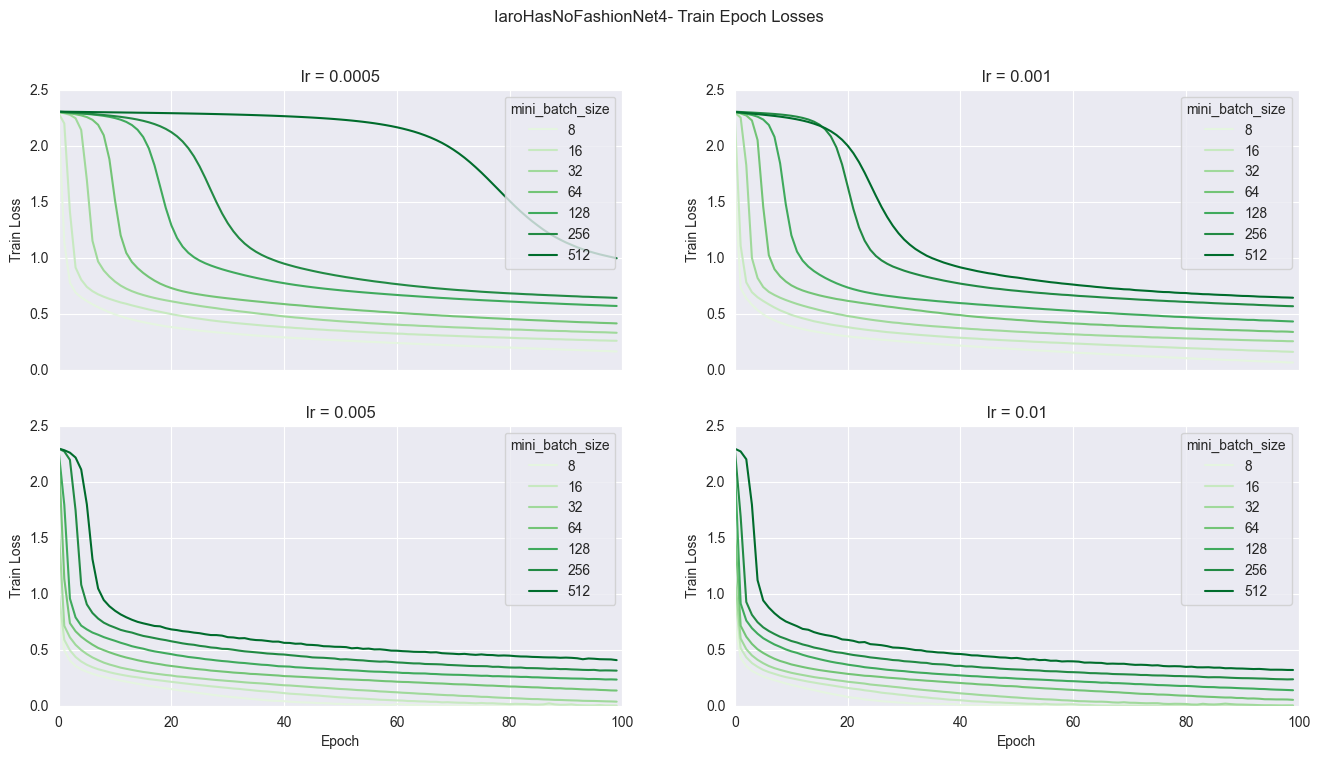

In [229]:
# extract the training loss
df = model_results.explode('train_epoch_losses', ignore_index=True)
df['pos']=df.index % 100

# change the values in min_batchs_size column to string
df.mini_batch_size = df.mini_batch_size.astype(str)

# using sns create subplots for each unique value of learning rate
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(16,8))
fig.suptitle('IaroHasNoFashionNet' + str(model) + '- Train Epoch Losses')

for lr, ax in zip(df.lr.unique(), ax.flatten()):
    sns.lineplot(x='pos', y='train_epoch_losses', data=df[df.lr == lr], hue='mini_batch_size', palette="Greens", ax=ax)
    ax.set_title(f'lr = {lr}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Train Loss')
    ax.set_ylim(0, 2.5)
    ax.set_xlim(0, 100)
    ax.grid(True)


# Plot evaluation accuracies for different learning rates and mini-batch sizes

(0.5, 1.0)

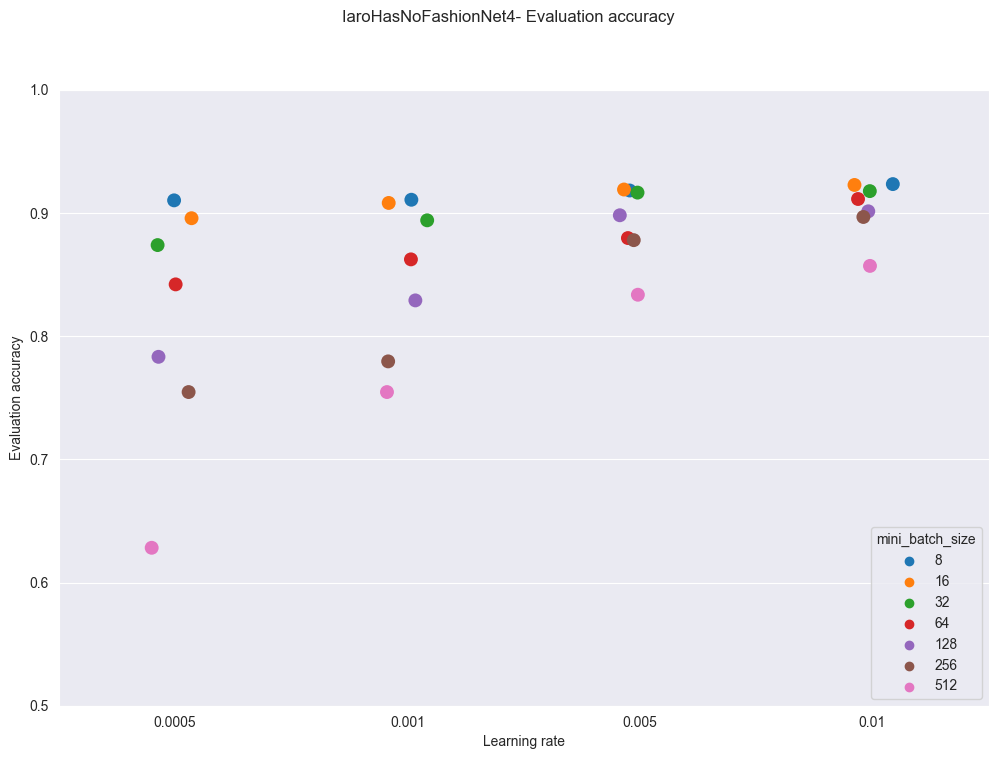

In [230]:
# set up the figure and axes
df = model_results.copy(deep=True)

df.mini_batch_size = df.mini_batch_size.astype("category")

fig = plt.figure(figsize=(12, 8))
fig.suptitle('IaroHasNoFashionNet' + str(model) + '- Evaluation accuracy')

ax = fig.subplots()
ax.set_xlabel('Learning rate')
ax.set_ylabel('Evaluation accuracy')
sns.stripplot(x='lr', y='accuracy', data=df, hue='mini_batch_size', s=10, ax=ax)
ax.set_ylim(0.5, 1)

# Plot confusion matrix for the selected model

Specify the parameters for the model to plot the confusion matrix

In [231]:
mat_lr = 0.001 # possible values: 0.0005, 0.001, 0.005, 0.01
mat_mbs = 8 # possible values: 8, 16, 32, 64, 128, 256, 512

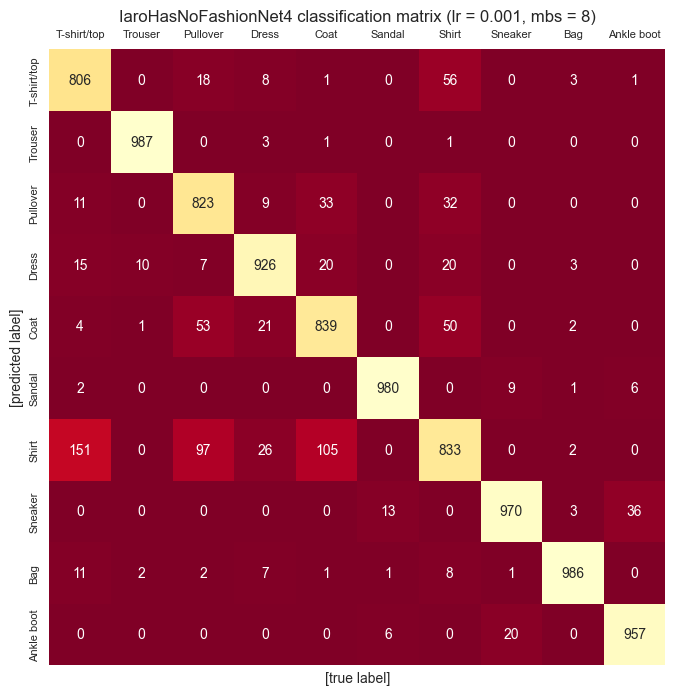

In [232]:
mat = model_results[(model_results.lr == mat_lr) & (model_results.mini_batch_size == mat_mbs)].conf_matrix.values[0]
# define fashion mnist classes
fashion_classes = {0: 'T-shirt/top',
                    1: 'Trouser',
                    2: 'Pullover',
                    3: 'Dress',
                    4: 'Coat',
                    5: 'Sandal',
                    6: 'Shirt',
                    7: 'Sneaker',
                    8: 'Bag',
                    9: 'Ankle boot'}
# initialize the plot and define size
plt.figure(figsize=(8, 8))

# plot corresponding confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=fashion_classes.values(), yticklabels=fashion_classes.values())
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# set plot title
plt.title('IaroHasNoFashionNet' + str(model) + ' classification matrix (lr = ' + str(mat_lr) + ', mbs = ' + str(mat_mbs) + ')')

# set plot axis lables
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

# Comparison of training and evaluation losses

(-0.01, 1.0)

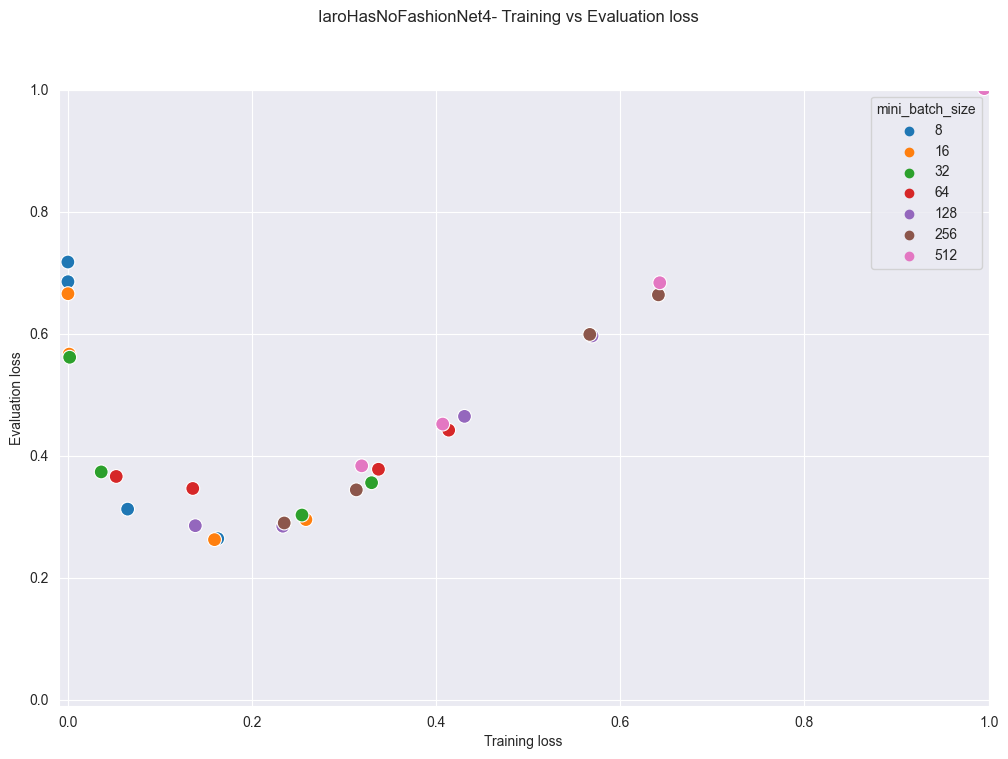

In [233]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle('IaroHasNoFashionNet' + str(model) + '- Training vs Evaluation loss')

ax = fig.subplots()
ax.set_xlabel('Training loss')
ax.set_ylabel('Evaluation loss')
sns.scatterplot(x='min_loss', y='eval_loss', data=df, hue='mini_batch_size', s=100, ax=ax)
ax.set_xlim(-0.01, 1.0)
ax.set_ylim(-0.01, 1.0)